# Linear Regression

In [21]:
# Importing necessary packages 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

#z-score
from scipy import stats

#To get access to a dataset
# from sklearn import datasets

#Import train_test_split function
from sklearn.model_selection import train_test_split

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [22]:
#Reading the given csv file
df = pd.read_csv('data_assignment2.csv')

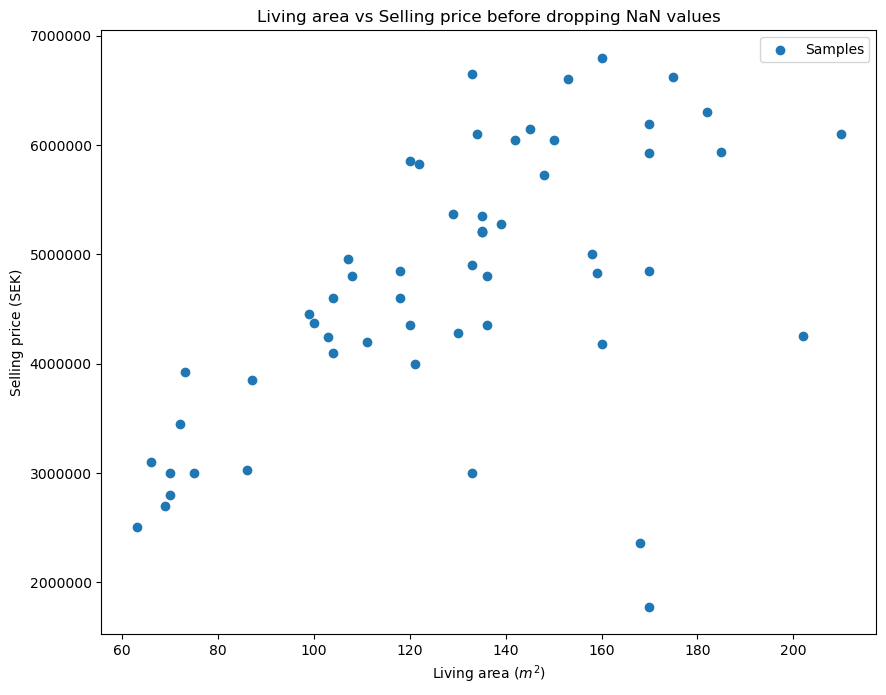

In [23]:
# Comparing Living area and Selling price to detect outliers
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(df['Living_area'],df['Selling_price'], label='Samples')
plt.title('Living area vs Selling price before dropping NaN values')
plt.xlabel('Living area ($m^2$)')
plt.ylabel('Selling price (SEK)')
plt.legend()
plt.savefig('Living area vs Selling price before dropping NaN values.png')
plt.show()

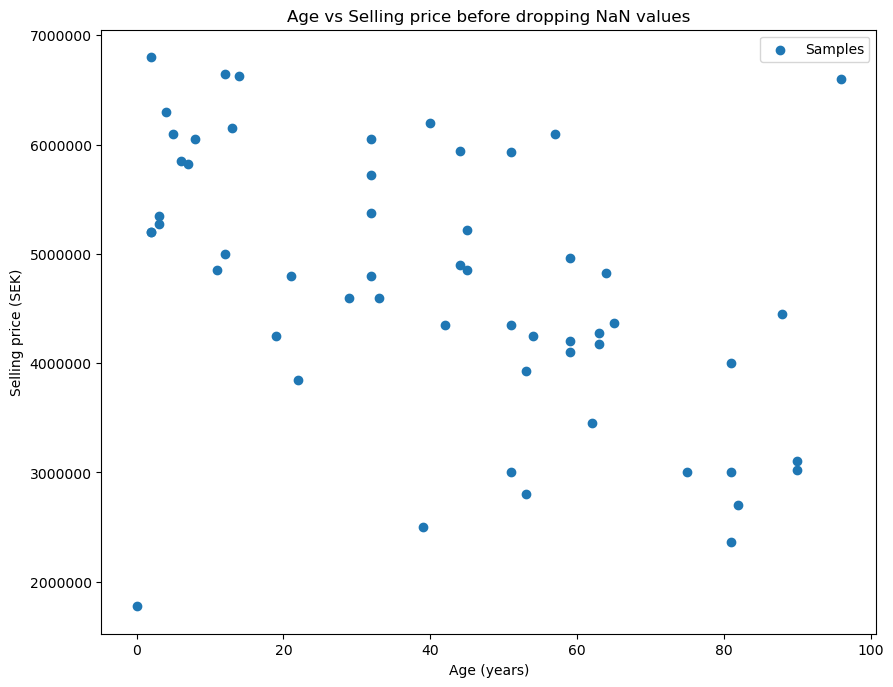

In [24]:
# Comparing Age and Selling price before dropping NaN values
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(df['Age'],df['Selling_price'],label='Samples')
plt.title('Age vs Selling price before dropping NaN values')
plt.xlabel('Age (years)')
plt.ylabel('Selling price (SEK)')
plt.legend()
plt.savefig('Age vs Selling price before dropping NaN values.png')
plt.show()

In [25]:
#Dropping NaN values:
df.dropna(subset=['Land_size','Biarea'],inplace=True)

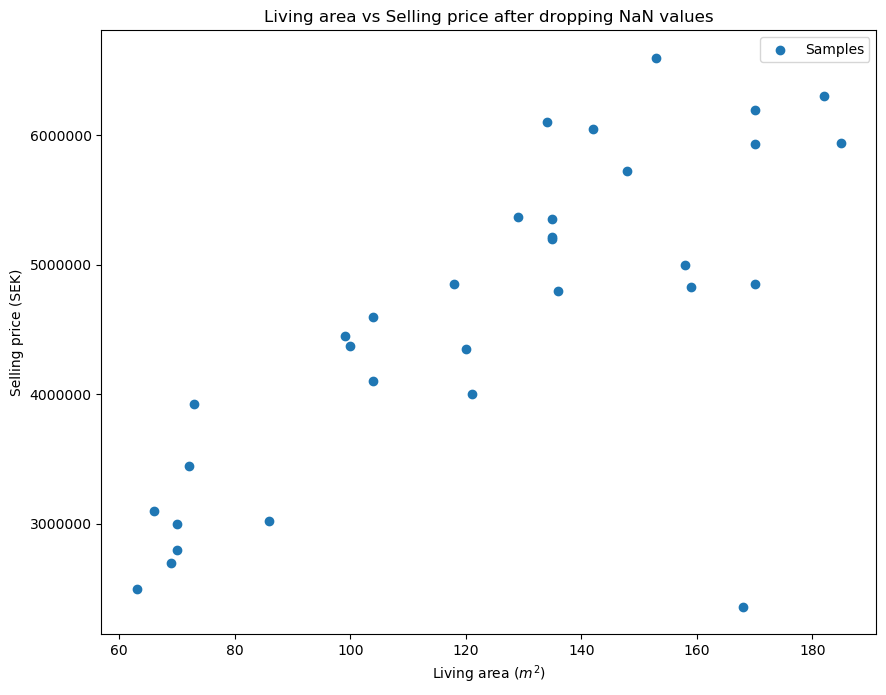

In [26]:
# Comparing Living area and Selling price after dropping NaN values
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(df['Living_area'],df['Selling_price'], label='Samples')
plt.title('Living area vs Selling price after dropping NaN values')
plt.xlabel('Living area ($m^2$)')
plt.ylabel('Selling price (SEK)')
plt.savefig('Living area vs Selling price after dropping NaN values.png')
plt.legend()
plt.show()

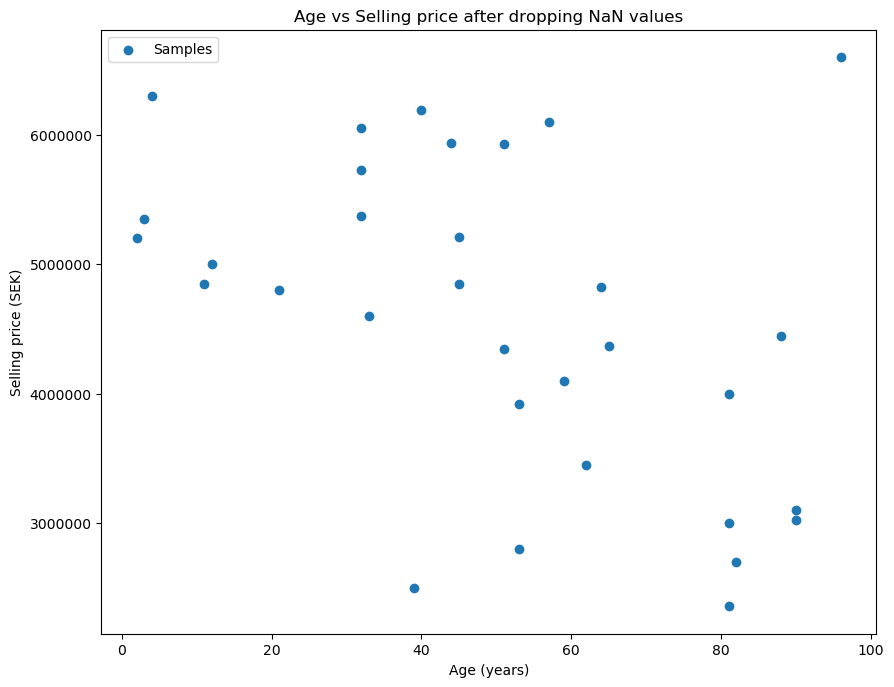

In [27]:
# Comparing Age and Selling price after dropping NaN values
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(df['Age'],df['Selling_price'],label='Samples')
plt.title('Age vs Selling price after dropping NaN values')
plt.xlabel('Age (years)')
plt.ylabel('Selling price (SEK)')
plt.legend()
plt.savefig('Age vs Selling price after dropping NaN values.png')
plt.show()

In [28]:
#Getting each columns as numpy array for ease of use:
living_area = df['Living_area'].values
selling_price = df['Selling_price'].values
age = df['Age'].values
land_size = df['Land_size'].values
biarea = df['Biarea'].values
rooms = df['Rooms'].values

In [29]:
# Defining the linear regression model
model = LinearRegression().fit(living_area[:,np.newaxis], selling_price)

In [30]:
living_area_min = living_area.min()
# living_area_min
living_area_max = living_area.max()
# living_area_max

In [31]:
# Predicting the selling price for the given living area using the model
xfit = np.linspace(living_area_min-20, living_area_max+20, 1000)
yfit = model.predict(xfit[:, np.newaxis])

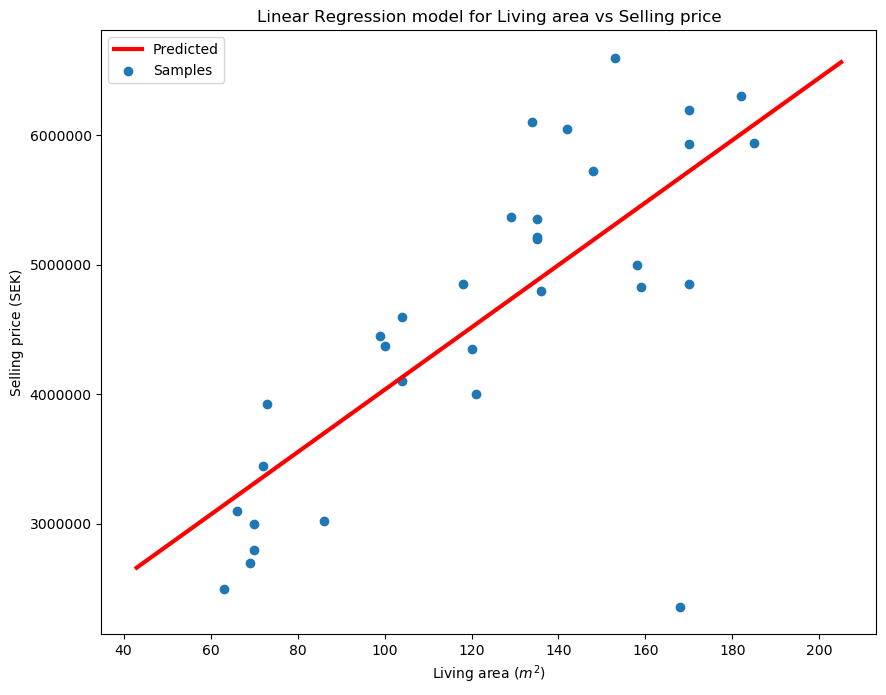

In [32]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(living_area, selling_price, label='Samples')
plt.title('Linear Regression model for Living area vs Selling price')
plt.xlabel('Living area ($m^2$)')
plt.ylabel('Selling price (SEK)')
plt.plot(xfit, yfit, color='r',linewidth=3, label='Predicted')
plt.legend()
plt.savefig('Linear Regression model for Living area vs Selling price.png')
plt.show()

In [33]:
# Slope
print("Slope: {}".format(model.coef_[0]))
#Intercept
print("Intercept: {}".format(model.intercept_))

Slope: 24097.986981140486
Intercept: 1624610.604574435


In [34]:
# for 100m2
print("Selling price for living area of 100 m^2 is {} SEK".format(model.predict([[100]])[0]))
# for 150m2
print("Selling price for living area of 100 m^2 is {} SEK".format(model.predict([[150]])[0]))
# for 200m2
print("Selling price for living area of 100 m^2 is {} SEK".format(model.predict([[200]])[0]))

Selling price for living area of 100 m^2 is 4034409.3026884836 SEK
Selling price for living area of 100 m^2 is 5239308.6517455075 SEK
Selling price for living area of 100 m^2 is 6444208.000802532 SEK


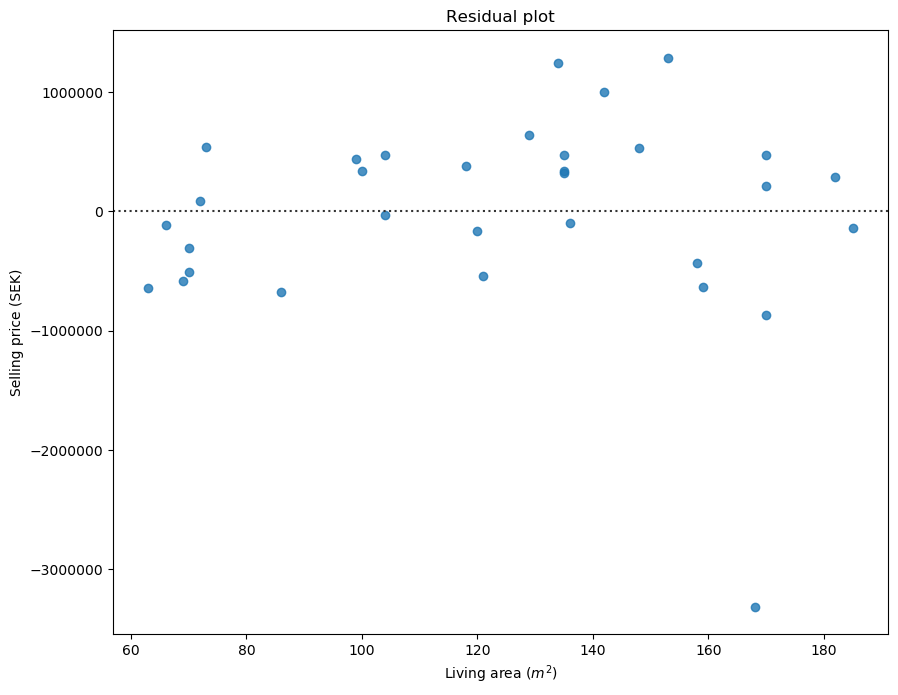

In [35]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.residplot(x='Living_area',y='Selling_price',data=df,lowess=False)
plt.xlabel('Living area ($m^2$)')
plt.ylabel('Selling price (SEK)')
plt.title('Residual plot')
plt.savefig('Residual plot.png')

In [36]:
#Detecting outlier points:
df[(age > age.mean()) & (selling_price > selling_price.mean()) & 
           ((land_size < land_size.mean()) | (living_area < living_area.mean()) | (biarea < biarea.mean()))]

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
47,48,170,7.0,1098.0,20.0,51,5930000
55,56,159,7.0,1315.0,30.0,64,4825000


In [37]:
# Dropping off those outlier data from the dataframe
df.drop([47,55], axis=0, inplace=True)
# df

In [38]:
living_area = df['Living_area'].values
selling_price = df['Selling_price'].values
age = df['Age'].values
land_size = df['Land_size'].values
biarea = df['Biarea'].values

In [39]:
# Defining the linear regression model
model = LinearRegression().fit(living_area[:,np.newaxis], selling_price)

living_area_min = living_area.min()
living_area_max = living_area.max()

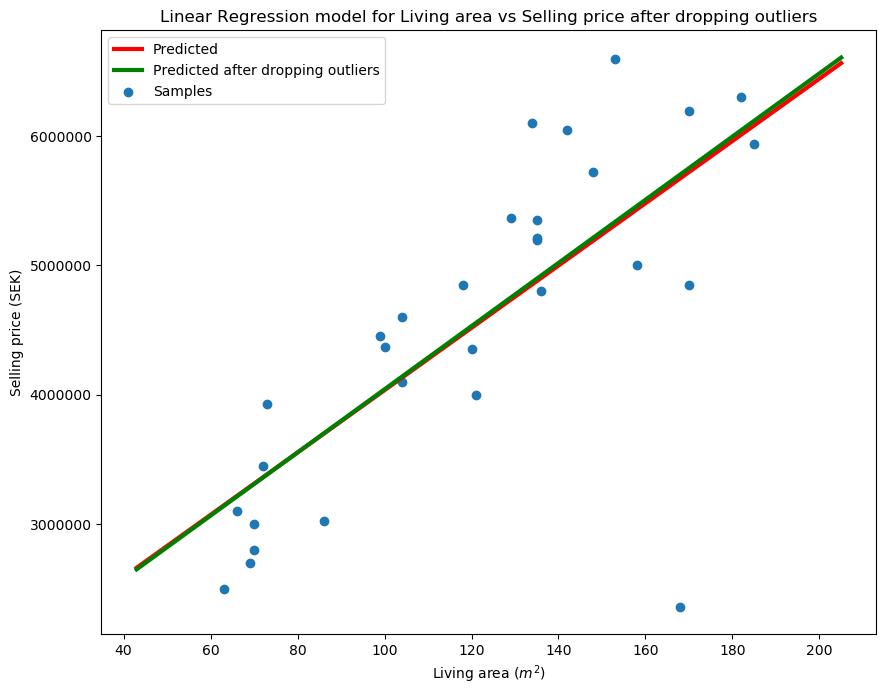

In [40]:
# Predicting the selling price for the given living area using the model
xfit = np.linspace(living_area_min-20, living_area_max+20, 1000)
yfit2 = model.predict(xfit[:, np.newaxis])

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(living_area, selling_price, label='Samples')
plt.title('Linear Regression model for Living area vs Selling price after dropping outliers')
plt.xlabel('Living area ($m^2$)')
plt.ylabel('Selling price (SEK)')
plt.plot(xfit, yfit, color='r',linewidth=3, label='Predicted')
plt.plot(xfit, yfit2, color='g',linewidth=3, label='Predicted after dropping outliers')
plt.legend()
plt.savefig('Linear Regression model for Living area vs Selling price after dropping outliers.png')
plt.show()

In [41]:
# Updated slope and intercept for the model:
# Slope
print("Slope: {}".format(model.coef_[0]))
#Intercept
print("Intercept: {}".format(model.intercept_))

Slope: 24437.298840104457
Intercept: 1597805.4897674131


In [42]:
# for 100m2
print("Selling price for living area of 100 m^2 is {} SEK".format(model.predict([[100]])[0]))
# for 150m2
print("Selling price for living area of 100 m^2 is {} SEK".format(model.predict([[150]])[0]))
# for 100m2
print("Selling price for living area of 100 m^2 is {} SEK".format(model.predict([[200]])[0]))

Selling price for living area of 100 m^2 is 4041535.373777859 SEK
Selling price for living area of 100 m^2 is 5263400.315783082 SEK
Selling price for living area of 100 m^2 is 6485265.257788304 SEK
